In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')

In [2]:
car=pd.read_csv('car_data.csv')

In [3]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
car.shape

(892, 6)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


<Axes: >

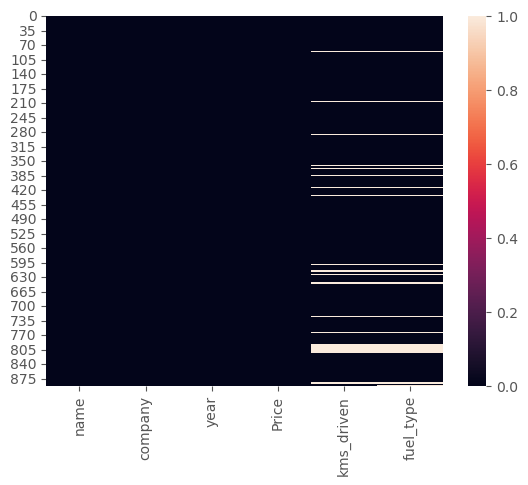

In [6]:
sns.heatmap(car.isnull())

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [7]:
car.year.unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [8]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [9]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [10]:
car=car[car['Price']!='Ask For Price']

In [11]:
#here you can see where Price = Ask For Price that column removes
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int32 
 3   Price       819 non-null    object
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int32(1), object(5)
memory usage: 41.6+ KB


#### Price has commas in its prices and is in object

In [12]:
car.Price.unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

In [13]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [14]:
#here you can see Price shows integer values without haing comma 
car[['Price']]

,Price
0,80000
1,425000
3,325000
4,575000
6,175000
...,...
886,300000
888,260000
889,390000
890,180000


####  kms_driven has object values with kms at last.

In [15]:
car.kms_driven.unique()

array(['45,000 kms', '40 kms', '28,000 kms', '36,000 kms', '41,000 kms',
       '25,000 kms', '24,530 kms', '60,000 kms', '30,000 kms',
       '32,000 kms', '48,660 kms', '4,000 kms', '16,934 kms',
       '43,000 kms', '35,550 kms', '39,522 kms', '39,000 kms',
       '55,000 kms', '72,000 kms', '15,975 kms', '70,000 kms',
       '23,452 kms', '35,522 kms', '48,508 kms', '15,487 kms',
       '82,000 kms', '20,000 kms', '68,000 kms', '38,000 kms',
       '27,000 kms', '33,000 kms', '46,000 kms', '16,000 kms',
       '47,000 kms', '35,000 kms', '30,874 kms', '15,000 kms',
       '29,685 kms', '1,30,000 kms', '19,000 kms', '54,000 kms',
       '13,000 kms', '38,200 kms', '22,000 kms', '50,000 kms',
       '13,500 kms', '3,600 kms', '45,863 kms', '60,500 kms',
       '12,500 kms', '18,000 kms', '13,349 kms', '29,000 kms',
       '44,000 kms', '42,000 kms', '14,000 kms', '49,000 kms',
       '36,200 kms', '51,000 kms', '1,04,000 kms', '33,333 kms',
       '33,600 kms', '5,600 kms', '7,500 km

In [16]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

In [17]:
car[['kms_driven']]

,kms_driven
0,45000
1,40
3,28000
4,36000
6,41000
...,...
886,132000
888,27000
889,40000
890,Petrol


#### It has nan values and two rows have 'Petrol' in them

In [18]:
car=car[car['kms_driven'].str.isnumeric()]

In [19]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [20]:
car.fuel_type.unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [21]:
car=car[~car['fuel_type'].isna()]

In [22]:
#here we remove nan value in fuel_type column
car.fuel_type.unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

In [23]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [24]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [25]:
car=car.reset_index(drop=True)

## Cleaned Data

In [26]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [27]:
car.to_csv('Cleaned_Car_data.csv')

In [28]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [29]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [30]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [31]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [32]:
import seaborn as sns

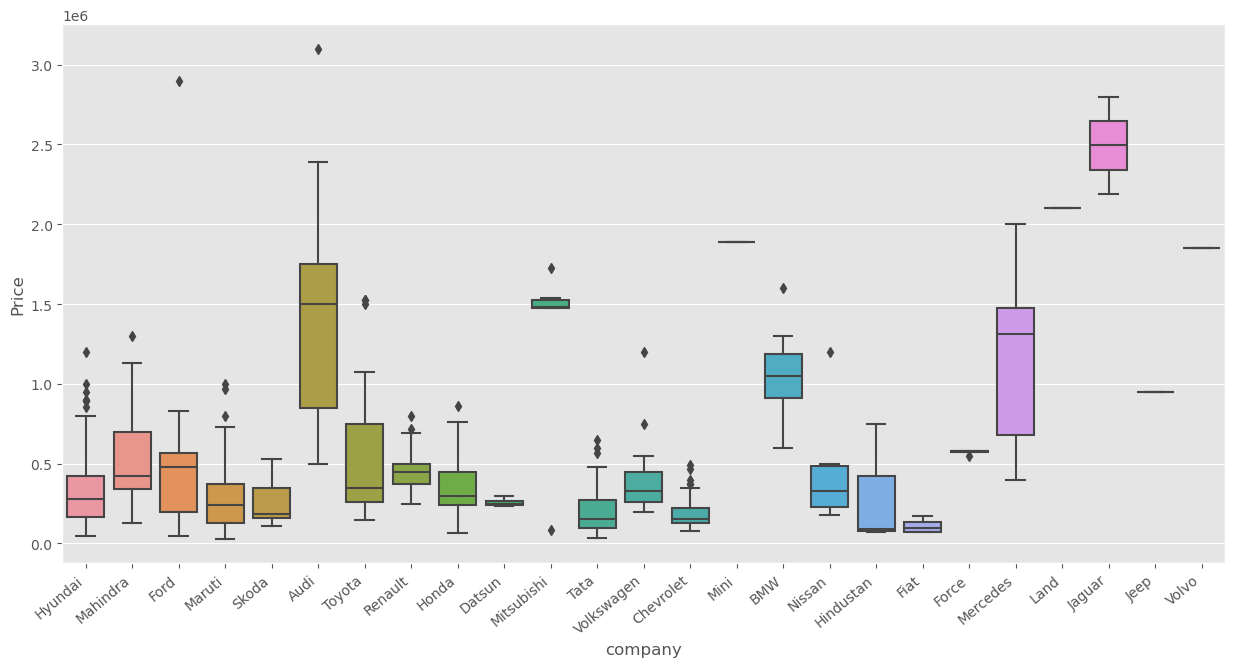

In [33]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

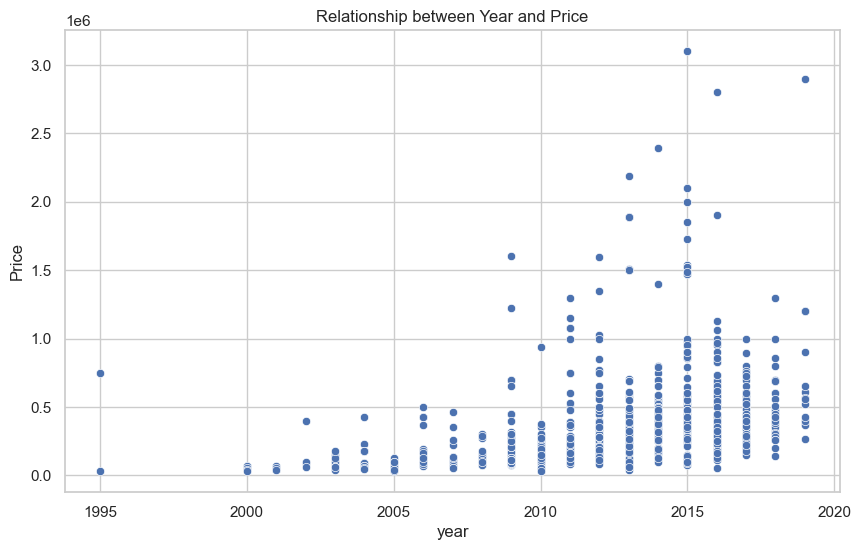

In [34]:
# Assuming 'car' is your DataFrame
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Price', data=car)
plt.title('Relationship between Year and Price')
plt.xlabel('year')
plt.ylabel('Price')
plt.show()

In [35]:
# Correlation between Year and Price
correlation = car['year'].corr(car['Price'])
print(f'Correlation between Year and Price: {correlation}')

Correlation between Year and Price: 0.3477642628077001


### Checking relationship of kms_driven with Price

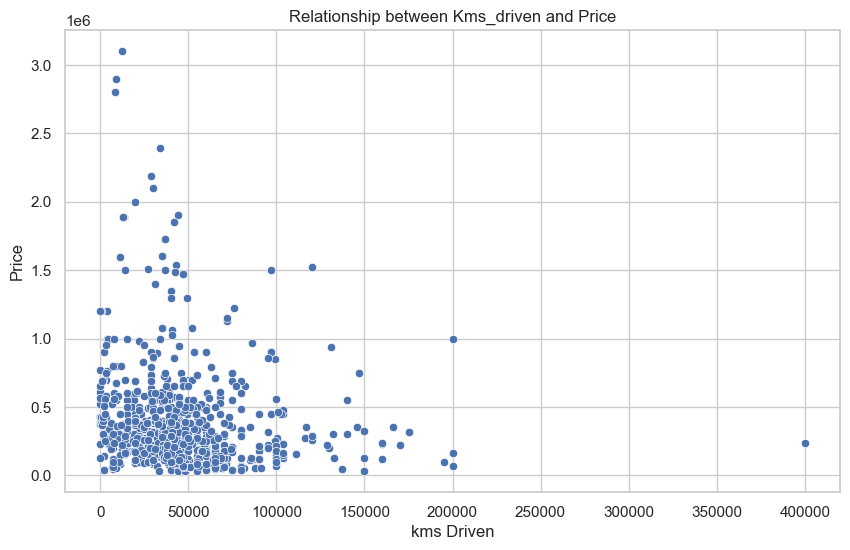

In [36]:
sns.set(style="whitegrid")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kms_driven', y='Price', data=car)
plt.title('Relationship between Kms_driven and Price')
plt.xlabel('kms Driven')
plt.ylabel('Price')
plt.show()


In [37]:
# Correlation between Kms_driven and Price
correlation = car['kms_driven'].corr(car['Price'])
print(f'Correlation between Kms_driven and Price: {correlation}')

Correlation between Kms_driven and Price: -0.1496210083316948


### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

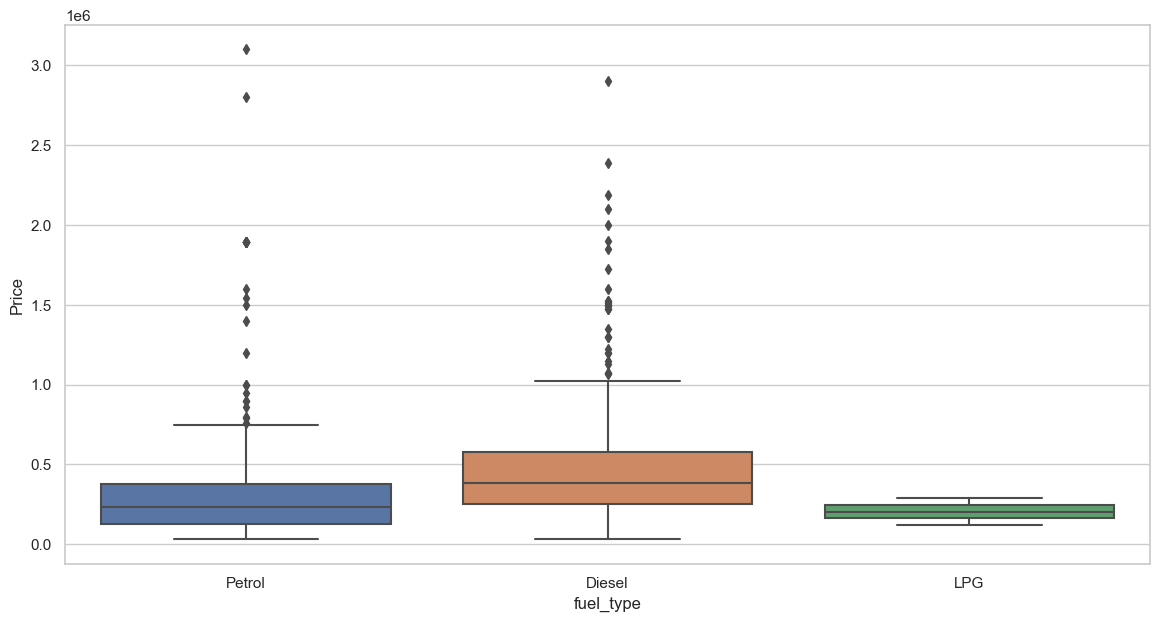

In [38]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

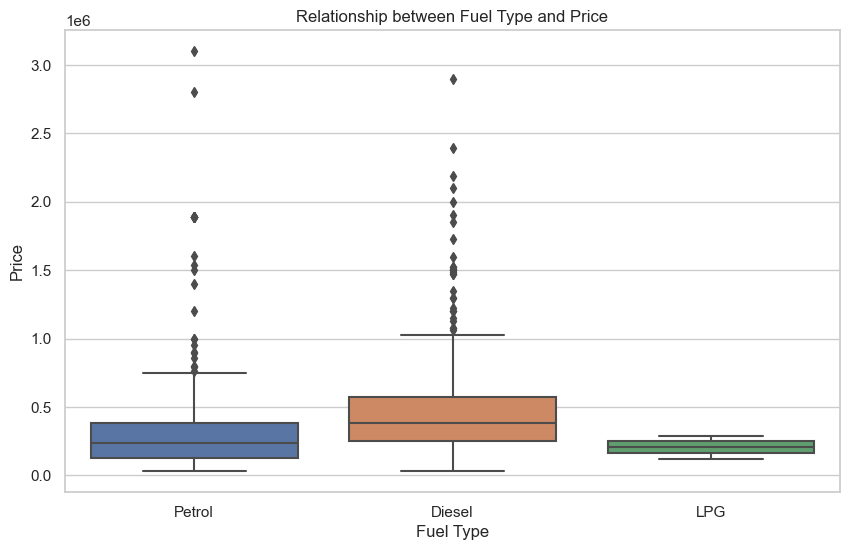

In [39]:
sns.set(style="whitegrid")

# Box plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='Price', data=car)
plt.title('Relationship between Fuel Type and Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

In [40]:
# If you want to calculate the mean price for each fuel type
mean_prices = car.groupby('fuel_type')['Price'].mean()
print(mean_prices)

fuel_type
Diesel    489095.740260
LPG       205000.000000
Petrol    324181.567757
Name: Price, dtype: float64


### Relationship of Price with FuelType, Year and Company mixed

<Figure size 1600x800 with 0 Axes>

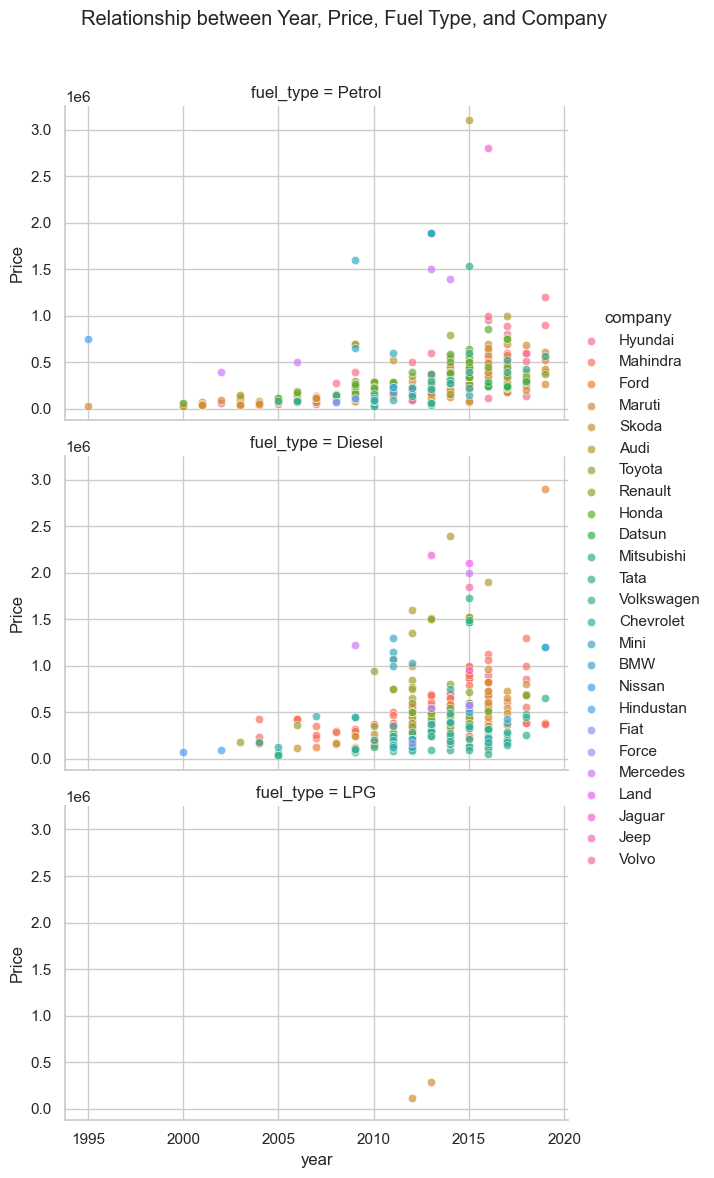

In [41]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 8))
# FacetGrid to visualize the relationship
g = sns.FacetGrid(car, col='fuel_type', hue='company', height=4, aspect=1.5, col_wrap=1)
g.map(sns.scatterplot, 'year', 'Price', alpha=.7)
g.add_legend()

# Add a title to the FacetGrid
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Year, Price, Fuel Type, and Company')

plt.show()

### Extracting Training Data

In [42]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [43]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [44]:
y.shape

(815,)

### Applying Train Test Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [48]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

# Final Output:
When you apply column_trans to a dataset, it will:

Convert the name, company, and fuel_type columns into binary columns representing the presence or absence of each category.
Keep the remaining columns as they are.
This is useful in preparing the data for machine learning models that require numerical input,
as categorical variables need to be converted into a format that the model can understand.

In [49]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

# Linear Regression Model

In [50]:
lr=LinearRegression()

# Pipeline Creation:
The make_pipeline function creates a pipeline that combines the column_trans transformation and the lr model.
The pipeline first applies the transformations specified in column_trans 
(e.g., one-hot encoding of categorical variables) to the input data.
After transforming the data, it passes the transformed data to the lr model for training or prediction.

In [51]:
pipe=make_pipeline(column_trans,lr)

# Fitting the  model

In [52]:
pipe.fit(X_train,y_train)

C:\Users\umer\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [53]:
y_pred=pipe.predict(X_test)

# Checking R2 Score

In [54]:
r2_score(y_test,y_pred)

0.6400001212585668

# Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [55]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [56]:
np.argmax(scores)

302

In [57]:
scores[np.argmax(scores)]

0.8991157554877304

In [58]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([430301.37134528])

# The best model is found at a certain random state 

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8991157554877304

In [60]:
import joblib

In [61]:
joblib.dump(pipe, 'car_price_prediction_model.pkl')

['car_price_prediction_model.pkl']

In [62]:
loaded_model = joblib.load('car_price_prediction_model.pkl')

In [86]:
predictions = loaded_model.predict(X_test)
predictions

array([ 361843.84140199,  487362.561781  ,  698184.02144808,
        162900.94008769,  219545.84519875, 1977675.66401523,
        248779.42090786, 1104354.53512798, 1977675.66401523,
        322142.9583534 ,  345252.05957957,  450988.84656234,
        336075.17537   ,  163909.81752521,  358649.60792306,
        242126.56176105,  401856.394265  , -192675.61802252,
        315637.9338571 ,  496187.94368988,  207386.6787817 ,
        317210.81889685, 1619399.03573515,  267036.63317792,
        388641.13218825,   87789.12006236,  434034.63272949,
        269763.9503811 ,  -28355.93431455,  204433.83324666,
        646248.99231919,  434052.57869593,  289084.68848582,
        253684.62905212,  738831.60465159,  351252.78165311,
        148949.71702962,   74362.83896314, 1072584.02852143,
        164420.47818234,  185037.70272435,  369111.68279777,
        642257.0236307 ,  612204.23522615,  397013.4560178 ,
        416128.24543356,  568040.50933623,  254753.67733224,
       1977675.66401523,